In [1]:
import matplotlib.pyplot as plt
    
import pandas as pd
import seaborn as sns

In [94]:
import json
replace = {
    'm_fwd': 'Alpha Forward',
    'm_rev': 'Alpha Reverse',
    'm_swr': 'Alpha SWR',
    'm_freq': 'Alpha Frequency',
    'm_temp': 'Alpha Temperature',
    't_fwd': 'MC-200 Forward',
    't_rev': 'MC-200 Reverse',
    't_swr': 'MC-200 SWR',
}
def load_file(*files: str):
    data = {}
    for filename in files:
        with open(filename) as f:
            for line in f.readlines():
                if line.startswith('//'):
                    continue

                d = json.loads(line)

                # drop all the metadata and the raw sample values
                record = {
                    **d['location'],
                    # **d['data'],
                }

                def sim(a, b):
                    diff = (b - a)
                    return (diff / a) * 100

                record['error_fwd'] = sim(d['data']['m_fwd'], d['data']['t_fwd'])
                record['error_rev'] = sim(d['data']['m_rev'], d['data']['t_rev'])
                record['error_swr'] = sim(d['data']['m_swr'], d['data']['t_swr'])

                for k, v in replace.items():
                    record[v] = d['data'][k]

                location = d['location']
                key = f"{location['ant']}:{location['freq']}:{location['power']}"
                data[key] = record

    df = pd.DataFrame.from_records(list(data.values()))

    return df

df = load_file('data.jsonl')
#df['freq'] = df['freq'].astype(float)

In [95]:
df.sample(10)

,ant,freq,power,error_fwd,error_rev,error_swr,Alpha Forward,Alpha Reverse,Alpha SWR,Alpha Frequency,Alpha Temperature,MC-200 Forward,MC-200 Reverse,MC-200 SWR
229,1,50000000,100,-22.834205,48.609539,43.784815,96.772776,14.312696,2.287496,78.012496,49.0,74.675482,21.270031,3.289072
262,2,01800000,190,24.110706,97.342253,38.923047,71.548160,14.126311,2.554333,78.124999,1.0,88.798927,27.877180,3.548558
503,3,01800000,200,3.510376,-0.956110,0.188625,41.990883,23.662644,6.515166,78.687499,1.0,43.464920,23.436403,6.527455
669,3,24890000,180,-8.799634,59.507584,171.732225,40.744124,16.517500,4.291608,78.912497,24.0,37.158790,26.346665,11.661681
146,1,21000000,25,-5.101380,66.449288,12.191633,26.094069,0.701325,1.385727,77.742499,20.0,24.762911,1.167350,1.554670
331,2,10100000,160,0.719941,2.356176,4.186219,71.453138,24.509392,3.726952,78.237501,10.0,71.967558,25.086876,3.882971
130,1,18068000,70,0.466609,24.157816,5.108069,70.198464,2.436979,1.448485,77.675002,18.0,70.526016,3.025700,1.522474
219,1,50000000,10,-27.472647,48.102738,50.680081,10.672112,1.644665,2.359676,77.944998,49.0,7.740201,2.435794,3.555561
643,3,21000000,160,-12.967970,35.124341,144.815369,39.743757,18.400528,4.960229,78.912497,20.0,34.589798,24.863592,12.143403
35,1,03500000,80,14.182945,-50.841408,-12.695741,79.615791,3.164174,1.490172,77.562499,3.0,90.907655,1.555463,1.300984


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ant                720 non-null    int64  
 1   freq               720 non-null    object 
 2   power              720 non-null    int64  
 3   error_fwd          720 non-null    float64
 4   error_rev          720 non-null    float64
 5   error_swr          720 non-null    float64
 6   Alpha Forward      720 non-null    float64
 7   Alpha Reverse      720 non-null    float64
 8   Alpha SWR          720 non-null    float64
 9   Alpha Frequency    720 non-null    float64
 10  Alpha Temperature  720 non-null    float64
 11  MC-200 Forward     720 non-null    float64
 12  MC-200 Reverse     720 non-null    float64
 13  MC-200 SWR         720 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 78.9+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '01800000'),
  Text(1, 0, '03500000'),
  Text(2, 0, '07000000'),
  Text(3, 0, '10100000'),
  Text(4, 0, '14000000'),
  Text(5, 0, '18068000'),
  Text(6, 0, '21000000'),
  Text(7, 0, '24890000'),
  Text(8, 0, '28000000')])

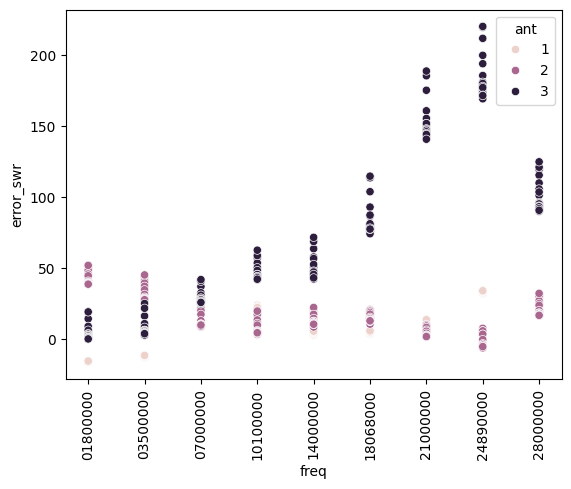

In [110]:
fig, ax = plt.subplots()
sns.scatterplot(df.query("freq != '50000000'"), x='freq', y='error_swr', hue='ant')
plt.xticks(rotation=90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

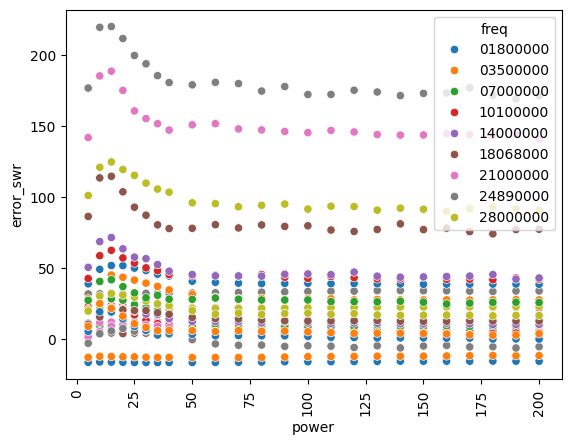

In [108]:
fig, ax = plt.subplots()
sns.scatterplot(df.query("freq != '50000000'"), x='power', y='error_swr', hue='freq')
plt.xticks(rotation=90)

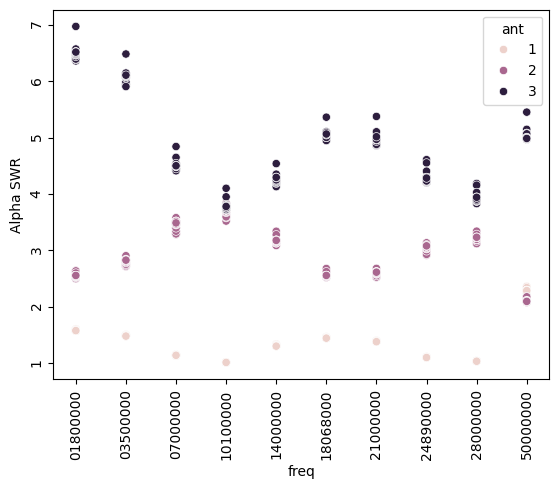

In [99]:

fig, ax = plt.subplots()
sns.scatterplot(df, x='freq', y='Alpha SWR', hue='ant',ax=ax)
ax.tick_params(rotation=90)



In [100]:
df.sample(10)

,ant,freq,power,error_fwd,error_rev,error_swr,Alpha Forward,Alpha Reverse,Alpha SWR,Alpha Frequency,Alpha Temperature,MC-200 Forward,MC-200 Reverse,MC-200 SWR
424,2,24890000,130,4.648799,-5.675933,-4.557944,87.048358,23.135936,3.056685,78.372498,24.0,91.095062,21.822755,2.917363
604,3,18068000,30,-10.873760,25.424606,87.365994,34.549570,15.950351,4.969958,78.800002,18.0,30.792733,20.005665,9.312011
276,2,03500000,90,15.142765,57.556043,27.674687,67.939478,15.887894,2.823515,78.237501,3.0,78.227394,25.032337,3.604914
123,1,18068000,10,-4.714161,16.958677,4.158341,11.205454,0.390112,1.460448,77.675002,18.0,10.677211,0.456270,1.521178
238,1,50000000,190,-22.899158,47.816828,43.377645,96.786022,14.318531,2.286766,78.012496,49.0,74.622837,21.165198,3.278712
574,3,10100000,190,20.985641,62.291865,43.216936,40.206646,14.125870,3.756261,78.800002,10.0,48.644269,22.925138,5.379602
603,3,18068000,10,-13.483940,32.577329,113.608811,12.507928,5.647758,5.099252,78.800002,18.0,10.821366,7.487646,10.892452
461,2,50000000,15,-9.080276,-43.132073,-17.392614,13.533612,1.759771,2.176471,78.574995,49.0,12.304723,1.000745,1.797926
32,1,03500000,50,13.105333,-52.254823,-12.777078,53.445602,2.135219,1.488703,77.562499,3.0,60.449826,1.019464,1.298491
481,3,01800000,5,2.981785,7.256536,5.632708,5.025004,2.792917,6.970000,78.574995,1.0,5.174839,2.995586,7.362600


In [157]:

def load_old_file(*files: str):
    data = []
    for filename in files:
        with open(filename) as f:
            for line in f.readlines():
                if line.startswith('//'):
                    continue

                d = json.loads(line)

                # drop all the metadata and the raw sample values
                data.append(d)

    df = pd.DataFrame(data)

    return df

old_data = load_old_file('old_data2.jsonl')

In [158]:
old_data.sample(10)

,freq,power,m_freq,m_fwd,m_rev,m_swr,m_temp,t_freq,t_fwd_volts,t_fwd_watts,t_mq,t_rev_volts,t_rev_watts,t_swr
151,50000000,040,49.991998,38.411281,0.062092,1.084781,76.572501,50249.2,2896.73750,54.509316,103.746699,73.37500,0.035729,1.100000
38,07000000,035,6.995220,35.052723,0.051965,1.078244,75.874999,7029.4,2783.08750,49.629705,43.766376,29.73750,0.100878,1.100554
14,01800000,110,1.795447,107.787478,5.041143,1.544293,75.784996,1808.0,3773.76875,153.914535,249.661300,230.01875,6.130001,1.498647
157,50000000,100,49.992450,94.328238,0.155749,1.086289,76.662497,50288.6,4592.71250,144.697043,155.917947,174.82500,0.102554,1.100000
158,50000000,110,49.990544,94.334331,0.155669,1.086282,76.662497,50261.4,4592.11875,144.656497,156.995455,176.01250,0.103530,1.100000
47,07000000,120,6.994238,113.668616,0.171851,1.080193,75.987502,7033.0,4995.00000,167.015670,18.870711,23.01250,0.063763,1.100000
20,03500000,025,3.489789,26.369733,0.926909,1.450254,75.852498,3515.8,2192.48125,37.671966,34.397324,18.41250,1.237295,1.442593
81,18068000,010,18.061237,10.950246,0.306146,1.402811,76.099997,18148.6,1444.66875,18.698340,25.712494,9.06875,0.469710,1.376663
122,24890000,070,24.886474,66.451154,0.003928,1.015196,76.347496,24999.8,3964.23125,96.904830,15.833782,15.32500,0.002625,1.100000
80,18068000,005,18.039334,4.957288,0.143355,1.411517,76.099997,18151.4,893.35625,14.694421,23.041503,5.02500,0.386762,1.387299


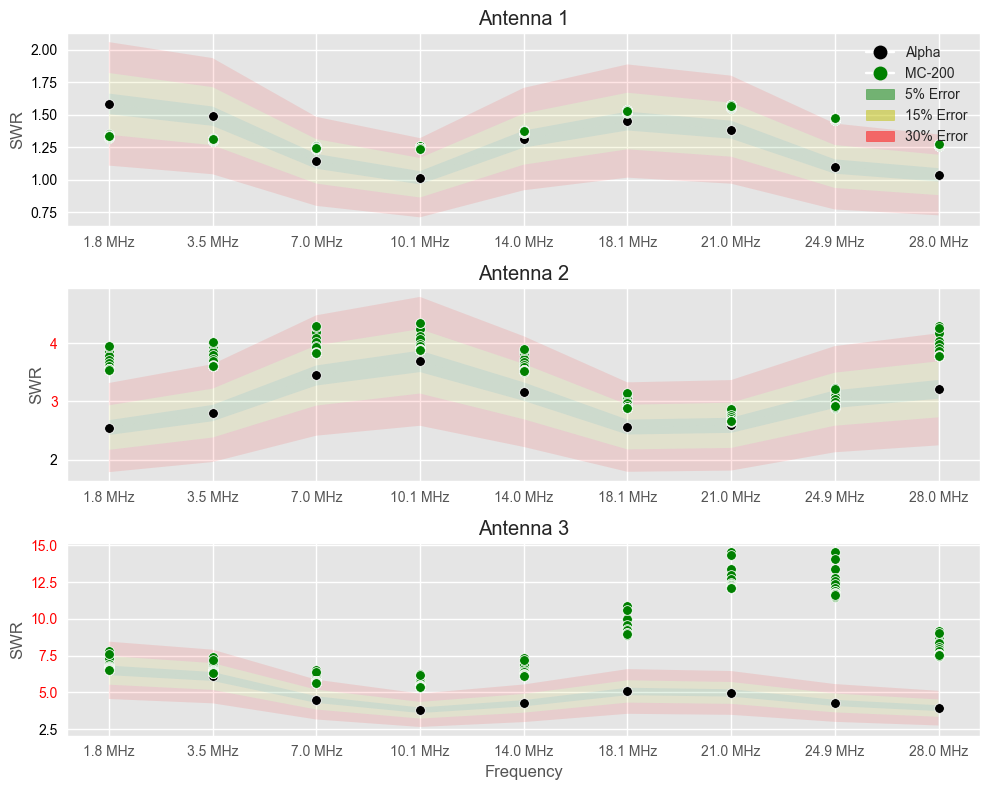

In [179]:
import matplotlib as mp



df_agg = df.query('freq!="50000000"').groupby(['freq','ant'])['Alpha SWR'].agg(['mean','median','std']).reset_index()
fig, ax = plt.subplots(nrows=3,figsize=(10,8))



for n in range(1,4):
    y1 =df_agg.query('ant==@n')['mean']
    # 5% fill
    axis=ax[n-1]
    args = {'alpha':0.1, 'edgecolor': None}
    axis.fill_between(df_ant['freq'], y1=y1, y2=y1 *1.05, color='g', **args)
    axis.fill_between(df_ant['freq'], y1=y1, y2=y1 *0.95, color='g', **args)
    # % 15 fill
    axis.fill_between(df_ant['freq'], y1=y1 *1.05,y2=y1*1.15, color='y', **args)
    axis.fill_between(df_ant['freq'], y1=y1 *0.95,y2=y1*0.85, color='y', **args)
    # % 30 fill
    axis.fill_between(df_ant['freq'], y1=y1 *1.15,y2=y1*1.30, color='r', **args)
    axis.fill_between(df_ant['freq'], y1=y1 *0.85,y2=y1*0.7 , color='r', **args)


    df_ant = df_agg.query('ant==@n')
    #axis.errorbar(x=df_ant['freq'], y=df_ant['mean'], yerr=df_ant['std'], fmt='none', color='k', capsize=5)  # custom error bars
    sns.scatterplot(df_ant, x='freq', y='mean', ax=axis, color='k')

    # plot the actual data
    sns.scatterplot(df.query('ant==@n & freq!="50000000"'), x='freq', y='MC-200 SWR', ax = axis, color='g')
    


    axis.set_ylabel("SWR")
    axis.set_xlabel("")
    axis.set_title(f"Antenna {n}")
    # Change the color of y-tick labels based on their value
    for tick in axis.get_yticklabels(): 
      tick_value = float(tick.get_text())
      if tick_value >= 3:
            tick.set_color('red')
      else:
            tick.set_color('black')

    # Custom x-tick labels
    tick_labels = {t._text: f"{float(t._text)/1e6:0.01f} MHz" for t in axis.get_xticklabels()}
    axis.set_xticks(list(tick_labels.keys()))
    axis.set_xticklabels([tick_labels[k] for k in tick_labels.keys()])

# plot the old data
#sns.scatterplot(old_data.query('freq!="50000000"'), x='freq', y='t_swr', ax = ax[0], color='b')

plt.xlabel("Frequency")


plt.tight_layout()
plt.style.use('ggplot')


from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements = [Line2D([0], [0], color=None, marker='o', label='Alpha',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], color=None, marker='o', label='MC-200',
                          markerfacecolor='g', markersize=10),
                   #Line2D([0], [0], color=None, marker='o', label='Bruene',
                          #markerfacecolor='b', markersize=10),
                   Patch(facecolor='g', edgecolor='g', alpha=0.5,
                         label='5% Error'),
                   Patch(facecolor='y', edgecolor='y', alpha=0.5,
                         label='15% Error'),
                   Patch(facecolor='r', edgecolor='r', alpha=0.5,
                         label='30% Error')]

ax[0].legend(handles=legend_elements, loc='upper right')

# TODO : label map for frequencies


In [170]:
f"{int(tick_labels[0]._text)/1e6} MHz"


'1.8 MHz'